In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")


In [4]:
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Apple", 10, 2.5),
        ("Banana", 8, 1.5),
        ("Orange", 12, 3.0),
        ("Apple", 5, 2.5),
        ("Banana", 7, 1.5),
        ("Grapes", 15, 4.0),
        ("Mango", 10, 5.0),
        ("Apple", 8, 2.5),
        ("Banana", 9, 1.5),
        ("Orange", 11, 3.0),
        ("Grapes", 7, 4.0),
        ("Mango", 12, 5.0),
        ("Apple", 6, 2.5),
        ("Banana", 10, 1.5),
        ("Orange", 8, 3.0),
        ("Grapes", 9, 4.0),
        ("Mango", 5, 5.0),
        ("Apple", 7, 2.5),
        ("Banana", 6, 1.5),
        ("Orange", 9, 3.0),
        ("Grapes", 8, 4.0),
        ("Mango", 11, 5.0),
        ("Pineapple", 4, 6.0),
        ("Pineapple", 5, 6.0),
        ("Kiwi", 3, 7.0)
    ]
    cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)
    conn.commit()

In [5]:
df_qty = pd.read_sql_query("""
SELECT product, SUM(quantity) AS total_quantity
FROM sales
GROUP BY product
""", conn)
df_qty

,product,total_quantity
0,Apple,36
1,Banana,40
2,Grapes,39
3,Kiwi,3
4,Mango,38
5,Orange,40
6,Pineapple,9


In [7]:
df_revenue = pd.read_sql_query("""
SELECT product, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
""", conn)
df_revenue['revenue'] = pd.to_numeric(df_revenue['revenue'])
df_revenue

,product,revenue
0,Apple,90.0
1,Banana,60.0
2,Grapes,156.0
3,Kiwi,21.0
4,Mango,190.0
5,Orange,120.0
6,Pineapple,54.0


In [8]:
df_total = pd.read_sql_query("""
SELECT SUM(quantity) AS total_quantity, SUM(quantity * price) AS total_revenue
FROM sales
""", conn)
df_total

,total_quantity,total_revenue
0,205,691.0


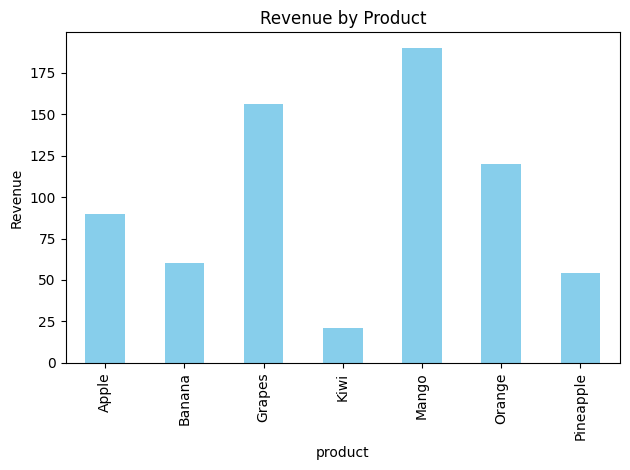

In [9]:
if not df_revenue.empty:
    df_revenue.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
    plt.ylabel("Revenue")
    plt.title("Revenue by Product")
    plt.tight_layout()
    plt.savefig("sales_chart.png") 
    plt.show()
else:
    print("No data to plot.")

In [10]:
conn.close()